INFO:
- sequences
    - yeast:
    - human:
- file size:
    - xml: yeast_query.xml = 842 MB, human_query.xml = 3.34 GB
    - tsv: yeast = 73 MB, human = 334.9 MB (10-fold reduction)
- data
    - yeast
        - hits: 395851
    - human
        - hits: 1728526

In [28]:
import sqlite3
conn = sqlite3.connect('data.db')
c = conn.cursor()

a = 'NP_013714'
#a = 'cheese'NP_013714 NP_006613
b = 'NP_006613' #'NP_013714'

hit1 = None
hit2 = None

try:
    hit1 = c.execute(f'SELECT * FROM DATA WHERE query LIKE "{a}%" AND hit LIKE "{b}%"').fetchall()[0]
    print('Query:', hit1[0], 'Hit:', hit1[1], 'Evalue:', hit1[2])
    print(f'{hit1[0]} ({hit1[5]}) - {hit1[4]}\n')
except IndexError:
    print('No hits in database for', a, 'against', b, '\n')
try:
    hit2 = c.execute(f'SELECT * FROM DATA WHERE query LIKE "{b}%" AND hit LIKE "{a}%"').fetchall()[0]
    print('Query:', hit2[0], 'Hit:', hit2[1], 'Evalue:', hit2[2])
    print(f'{hit2[0]} ({hit2[5]}) - {hit2[4]}\n')
except IndexError:
    print('No hits in database for', b, 'against', a, '\n')
    
if hit1 and hit2 != None:
    print('Orthologous proteins:', hit1[7] == 1 and hit2[7] == 1)

Query: NP_013714.1 Hit: NP_006613.2 Evalue: 6.671669999999997e-97
NP_013714.1 (Saccharomyces cerevisiae S288C) - polo kinase CDC5 

Query: NP_006613.2 Hit: NP_013714.1 Evalue: 9.058789999999999e-99
NP_006613.2 (Homo sapiens) - serine/threonine-protein kinase PLK2 isoform 1 

Orthologous proteins: False


In [21]:
hit1

('NP_012035.1',
 'NP_006436.3',
 0.0,
 7871.0,
 'U4/U6-U5 snRNP complex subunit PRP8 ',
 'Saccharomyces cerevisiae S288C',
 'pre-mRNA-processing-splicing factor 8 ',
 1)

In [12]:
if hit1.empty:
    print('No hits in database for', args.query1, 'against', args.query2, '\n')
else:
    print('Query:', hit1.iloc[0][0], 'Hit:', hit1.iloc[0][1], 'Evalue:', hit1.iloc[0][2])
    print(f'{hit1.iloc[0][0]} ({hit1.iloc[0][5]}) - {hit1.iloc[0][4]}\n')

if hit2.empty:
    print('No hits in database for', args.query2, 'against', args.query1, '\n')
else:
    print('Query:', hit2.iloc[0][0], 'Hit:', hit2.iloc[0][1], 'Evalue:', hit2.iloc[0][2])
    print(f'{hit2.iloc[0][0]} ({hit2.iloc[0][5]}) - {hit2.iloc[0][4]}\n')


if hit1.empty is False and hit2.empty is False:
    print('Orthologous proteins:', hit1.iloc[0][7] and hit2.iloc[0][7] == True)

('NP_012035.1',
 'NP_006436.3',
 0.0,
 7871.0,
 'U4/U6-U5 snRNP complex subunit PRP8 ',
 'Saccharomyces cerevisiae S288C',
 'pre-mRNA-processing-splicing factor 8 ',
 1)

In [ ]:
a = 'NP_006436.3'
b = 'NP_012035.1'

with open(args.db) as tsv:
    for line in csv.reader(tsv, delimiter="\t"):
        if args.query1 in line[0] and args.query2 in line[1]:
            hit1 = line
        elif args.query2 in line[0] and args.query1 in line[1]:
            hit2 = line

try:
    print('Query:', hit1[0], 'Hit:', hit1[1], 'Evalue:', hit1[2])
    print(f'{hit1[0]} ({hit1[5]}) - {hit1[4]}\n')
except TypeError:
    print('No hits in database for', args.query1, 'against', args.query2, '\n')

try:
    print('Query:', hit2[0], 'Hit:', hit2[1], 'Evalue:', hit2[2])
    print(f'{hit2[0]} ({hit2[5]}) - {hit2[4]}\n')
except TypeError:
    print('No hits in database for', args.query2, 'against', args.query1, '\n')

if hit1 and hit2 != None:
    print('Orthologous proteins:', hit1[7] == 'True' and hit2[7] == 'True')

In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [8]:
# save as slq database
import pandas as pd
df = pd.read_csv('data.tsv', sep='\t')
df.to_sql('users', con=engine)

In [11]:
import sqlite3

In [13]:
df.head()

,query,hit,evalue,score,q_desc,organism,h_desc,min
0,NP_000005.3,NP_010559.3,1.17890,69.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Don1p,True
1,NP_000005.3,NP_013589.1,1.92351,68.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Nab6p,False
2,NP_000005.3,NP_011499.1,3.92464,65.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Kap122p,False
3,NP_000005.3,NP_011712.1,5.56345,64.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Fyv8p,False
4,NP_000005.3,NP_014030.1,5.96215,64.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,ATP-binding cassette Fe/S cluster precursor tr...,False


In [32]:
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute('CREATE TABLE DATA (query text, hit number, evalue number, score number, q_desc text, organism text, h_desc text, min text)')
conn.commit()

OperationalError: table DATA already exists

In [15]:
df.to_sql('DATA', conn, if_exists='replace', index = False)

In [33]:
# SELECT * FROM YouTable WHERE col3 = 1 AND col2 in ('B','D');
d = c.execute('SELECT * FROM DATA WHERE query LIKE "NP_000005.3%" AND hit LIKE "NP_013589%"').fetchall()
len(d)

1

In [34]:
d

[('NP_000005.3',
  'NP_013589.1',
  1.92351,
  68.0,
  'alpha-2-macroglobulin isoform a precursor ',
  'Homo sapiens',
  'Nab6p ',
  0)]

In [24]:
df.head(10)

,query,hit,evalue,score,q_desc,organism,h_desc,min
0,NP_000005.3,NP_010559.3,1.178900,69.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Don1p,True
1,NP_000005.3,NP_013589.1,1.923510,68.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Nab6p,False
2,NP_000005.3,NP_011499.1,3.924640,65.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Kap122p,False
3,NP_000005.3,NP_011712.1,5.563450,64.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Fyv8p,False
4,NP_000005.3,NP_014030.1,5.962150,64.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,ATP-binding cassette Fe/S cluster precursor tr...,False
5,NP_000005.3,NP_013769.1,6.735800,63.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Stb2p,False
6,NP_000005.3,NP_013324.1,7.781390,63.0,alpha-2-macroglobulin isoform a precursor,Homo sapiens,Ifh1p,False
7,NP_000006.2,NP_014376.3,0.689947,64.0,arylamine N-acetyltransferase 2,Homo sapiens,rRNA (cytosine-C5-)-methyltransferase RCM1,True
8,NP_000006.2,NP_014217.1,1.681420,61.0,arylamine N-acetyltransferase 2,Homo sapiens,chromatin-binding/pre-rRNA-processing protein ...,False
9,NP_000006.2,NP_014046.1,1.772510,61.0,arylamine N-acetyltransferase 2,Homo sapiens,uncharacterized protein YMR315W,False


In [1]:
# tools
import time
import csv
import pandas as pd
from Bio.Blast import NCBIXML
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import dask.dataframe as dd
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML

In [3]:
# parse blast data (takes time)
with open('yeast_query.xml') as result_handle, open('yeast_query.tsv', 'w', newline='') as csvout:
    writer = csv.writer(csvout, delimiter='\t')
    for blast_result in NCBIXML.parse(result_handle):
        q = blast_result.query
        for desc in blast_result.descriptions:
            hit = desc.title
            e = desc.e
            score = desc.score
            writer.writerow([q, hit, e, score, 'yeast'])

# get human query data
with open('human_query.xml') as result_handle, open('human_query.tsv', 'w', newline='') as csvout:
    writer = csv.writer(csvout, delimiter='\t')
    for blast_result in NCBIXML.parse(result_handle):
        q = blast_result.query
        for desc in blast_result.descriptions:
            hit = desc.title
            e = desc.e
            score = desc.score
            writer.writerow([q, hit, e, score, 'human'])

In [ ]:
# organize the parsed files
files = ['yeast_query.tsv','human_query.tsv']

dfs = [pd.read_csv(f, sep='\t', names=['query','hit','evalue', 'score', 'organism']) for f in files]

df = pd.concat(dfs)

df['q_desc'] = df['query'].str.split('[').str[0].str.split(' ', 1).str[1]
df['organism'] = df['query'].str.rsplit("[",1).str[1].str[:-1]
df['query'] = df['query'].str.split(' ').str[0]
df['h_desc'] = df['hit'].str.split('[').str[0].str.split(' ',2).str[2]
df['hit'] = df['hit'].str.split(' ').str[1]

mins_df=pd.DataFrame(df.groupby('query')['evalue'].min())
mins_df['min']=True
final_output=df.merge(mins_df, how='left', left_on=['query','evalue'], right_on=['query','evalue'])
final_output.fillna(False, inplace=True)

df = df.sort_values(by=['organism','query','evalue'])
df.reset_index(drop=True, inplace=True)

df.to_csv('data.csv', index=False)

In [1]:
df.shape

NameError: name 'df' is not defined

In [ ]:
# test query
# true case
a = 'NP_006436.3'
b = 'NP_012035.1'

c = final_output.lo`a
c[(final_output['query'] == a) & (final_output['hit'] == b), 'min']
d = final_output.loc[(final_output['query'] == b) & (final_output['hit'] == c), 'min']
c.bool() == c.bool()

In [ ]:
# false case
a = 'NP_006436.3'
b = 'NP_013267.1'

c = final_output.loc[(final_output['query'] == a) & (final_output['hit'] == b), 'min']
d = final_output.loc[(final_output['query'] == b) & (final_output['hit'] == a), 'min']
c.bool() == d.bool()

In [5]:
# yeast
df_yeast = pd.read_csv('yeast_query.tsv', sep='\t', names=['query','hit','evalue', 'score', 'organism'])
df_yeast['q_desc'] = df_yeast['query'].str.split('[').str[0].str.split(' ', 1).str[1]
df_yeast['query'] = df_yeast['query'].str.split(' ').str[0]
df_yeast['h_desc'] = df_yeast['hit'].str.split('[').str[0].str.split(' ',2).str[2]
df_yeast['hit'] = df_yeast['hit'].str.split(' ').str[1]

In [6]:
df_human = pd.read_csv('human_query.tsv', sep='\t', names=['query','hit','evalue', 'score', 'organism'])
df_human['q_desc'] = df_human['query'].str.split('[').str[0].str.split(' ', 1).str[1]
df_human['query'] = df_human['query'].str.split(' ').str[0]
df_human['h_desc'] = df_human['hit'].str.split('[').str[0].str.split(' ',2).str[2]
df_human['hit'] = df_human['hit'].str.split(' ').str[1]

In [ ]:
df_yeast.to_csv('yeast.csv', index=False)
df_human.to_csv('human.csv', index=False)

In [7]:
# combine
df = pd.concat([df_yeast, df_human])

In [70]:
# create 'min' column

# save the minimums as a dataframe, and set value of new-variable 'minimum' to True
mins_df=pd.DataFrame(df.groupby('query')['evalue'].min())
mins_df['min']=True

#left join the minimums_df onto the original df.
df=df.merge(mins_df, how='left', left_on=['query','evalue'], right_on=['query','evalue'])

#replace the NaN with False, i.e. those that were not in mins_df
df.fillna(False, inplace=True)

df.to_csv('data.csv', index=False)

In [69]:
df.shape

(2124377, 7)

In [ ]:
# should now have everything saved
# currently trying to get boolean columns for is minimum
# then need a function to scan just the minimums and put them aside (maybe with index method?)
# no method for finding mutual lowpoint

In [10]:
df_yeast = pd.read_csv('yeast.csv')
df_yeast.shape

(395851, 7)

In [2]:
df = pd.read_csv('data.csv')
df.shape

(2124377, 7)

In [4]:
df.index

RangeIndex(start=0, stop=2124377, step=1)

In [9]:
df['organism'].value_counts()

human    1728526
yeast     395851
Name: organism, dtype: int64

In [11]:
# try tom's solution
ts1=time.time()

# save the minimums as a dataframe, and set value of new-variable 'minimum' to True
mins_df=pd.DataFrame(df.groupby('query')['evalue'].min())
mins_df['min']=True

#left join the minimums_df onto the original df.
final_output=df.merge(mins_df, how='left', left_on=['query','evalue'], right_on=['query','evalue'])

#replace the NaN with False, i.e. those that were not in mins_df
final_output.fillna(False, inplace=True)

print(time.time() - ts1, " seconds elapsed")

In [21]:
cross_df = pd.DataFrame(pd.crosstab(final_output['query'], final_output['min'], dropna=False))

min,False,True
query,,
NP_000005.3,6,1
NP_000006.2,4,1
NP_000007.1,4,1
NP_000008.1,3,1
NP_000009.1,4,1
...,...,...
YP_003024033.1,2,1
YP_003024035.1,7,1
YP_003024036.1,0,1


In [40]:
# true case
a = 'NP_006436.3'
b = 'NP_012035.1'

c = final_output.loc[(final_output['query'] == a) & (final_output['hit'] == b), 'min']
d = final_output.loc[(final_output['query'] == b) & (final_output['hit'] == c), 'min']
c.bool() == c.bool()

1030738    True
Name: min, dtype: bool

In [52]:
# false case
a = 'NP_006436.3'
b = 'NP_013267.1'

c = final_output.loc[(final_output['query'] == a) & (final_output['hit'] == b), 'min']
d = final_output.loc[(final_output['query'] == b) & (final_output['hit'] == a), 'min']
c.bool() == d.bool()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [55]:
final_output.loc[(final_output['query'] == b) & (final_output['hit'] == a)]

,query,hit,evalue,score,organism,q_desc,h_desc,min


In [60]:
a = 'NP_006436.3'
b = 'NP_013267.1'
if ((final_output['query'] == a) & (df['hit'] == b)).any():
    c = final_output.loc[(final_output['query'] == a) & (final_output['hit'] == b), 'min'].bool()
# reverse
if ((final_output['query'] == b) & (df['hit'] == a)).any():
    d = final_output.loc[(final_output['query'] == b) & (final_output['hit'] == a), 'min'].bool()
c == d

Series([], Name: min, dtype: bool)

In [65]:
# false case
a = 'NP_001018030.1'
b = 'XP_011536148.1'
c = final_output.loc[(final_output['query'] == a) & (final_output['hit'] == b), 'min'].bool()
d = final_output.loc[(final_output['query'] == b) & (final_output['hit'] == a), 'min'].bool()

In [66]:
c == d

False

In [64]:
final_output.loc[(final_output['query'] == b) & (final_output['hit'] == a)]

,query,hit,evalue,score,organism,q_desc,h_desc,min
1608952,XP_011536148.1,NP_001018030.1,1.443400e-57,477.0,human,serine dehydratase-like isoform X2,L-serine/L-threonine ammonia-lyase CHA1,True


In [29]:
final_output.head()

,query,hit,evalue,score,organism,q_desc,h_desc,min
0,NP_001018030.1,NP_006834.2,6.047210e-40,367.0,yeast,L-serine/L-threonine ammonia-lyase CHA1,L-serine dehydratase/L-threonine deaminase,True
1,NP_001018030.1,XP_011536148.1,2.964610e-37,348.0,yeast,L-serine/L-threonine ammonia-lyase CHA1,serine dehydratase-like isoform X2,False
2,NP_001018030.1,XP_005253888.1,2.964610e-37,348.0,yeast,L-serine/L-threonine ammonia-lyase CHA1,serine dehydratase-like isoform X2,False
3,NP_001018030.1,NP_612441.1,2.964610e-37,348.0,yeast,L-serine/L-threonine ammonia-lyase CHA1,serine dehydratase-like,False
4,NP_001018030.1,NP_001291922.1,2.964610e-37,348.0,yeast,L-serine/L-threonine ammonia-lyase CHA1,serine dehydratase-like,False


In [18]:
mins_df['evalue'].max()

9.99698

In [169]:
df['query'].nunique()

117768

In [10]:
new_df = dd.from_pandas(df, 24)

In [11]:
# sort: organism, query, evalue
# reindex
df = df.sort_values(by=['organism','query','evalue'])

df.reset_index(drop=True, inplace=True)

In [12]:
# need a minimum column, bool
def is_min(row):
    # get the minimum quantity for the given category value
    cat_min = df[df['query'] == row['query']]['evalue'].min()
    # get the minimum quantity for the current row
    row_min = row['evalue']
    return cat_min == row_min

new_df['is_min'] = new_df.apply(lambda x: is_min(x), axis=1, meta='bool')

In [ ]:
pand_df = new_df.compute()

In [ ]:
df['is_min'] = df.apply(lambda x: is_min(x), axis=1)

In [ ]:
pand_df.to_csv('pand_df.csv', index=False)

In [ ]:
df.to_csv('is_min.csv', index=False)

In [ ]:
df.apply(lambda x: check_min(x), axis=1)

In [ ]:
df.groupby('query')['evalue'].idxmin(axis=0)

In [163]:
df[df['organism'] == 'yeast']['query'].nunique()

5356

In [164]:
df[df['organism'] == 'human']['query'].nunique()

112412

In [146]:
# function to find reciprocal matches
# ans: NP_006436.3 -> NP_012035.1

# trick is to just search the minimals
# create new dataframe
df.groupby('query')['evalue'].min()

query
NP_000005.3        1.178900e+00
NP_000006.2        6.899470e-01
NP_000007.1        4.345580e-03
NP_000008.1        3.661760e-10
NP_000009.1        3.588200e-02
                      ...      
YP_003024033.1     1.837480e+00
YP_003024035.1     1.461130e-01
YP_003024036.1     3.288700e+00
YP_003024037.1     1.725600e-01
YP_003024038.1    1.446920e-129
Name: evalue, Length: 117768, dtype: float64

In [154]:
df.loc[(df['query'] == 'NP_006436.3') & (df['hit'] == 'NP_012035.1')]

,query,hit,evalue,score,organism,q_desc,h_desc
634887,NP_006436.3,NP_012035.1,0.0,7931.0,human,pre-mRNA-processing-splicing factor 8,U4/U6-U5 snRNP complex subunit PRP8


In [134]:
df.groupby['query']['evalue'].min()

TypeError: 'method' object is not subscriptable

In [ ]:
['NP_006436.3','NP_012035.1','NP_013267.1','NP_013374.1']

In [113]:
df[(df['query'] == 'NP_006436.3') | (df['hit'] == 'NP_006436.3')]

,query,hit,evalue,score,organism,q_desc,h_desc
172550,NP_012035.1,NP_006436.3,0.00000,7871.0,yeast,U4/U6-U5 snRNP complex subunit PRP8,pre-mRNA-processing-splicing factor 8
634887,NP_006436.3,NP_012035.1,0.00000,7931.0,human,pre-mRNA-processing-splicing factor 8,U4/U6-U5 snRNP complex subunit PRP8
634888,NP_006436.3,NP_013267.1,6.01830,66.0,human,pre-mRNA-processing-splicing factor 8,exocyst subunit SEC10
634889,NP_006436.3,NP_013374.1,6.37307,65.0,human,pre-mRNA-processing-splicing factor 8,condensin subunit YCS4


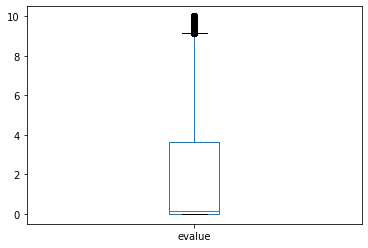

In [20]:
# reciprocal blast alignment


In [22]:
# combine
df1 = pd.read_csv('yeast_query.tsv', sep='\t', names=['query','hit','evalue', 'score', 'organism'])
df2 = pd.read_csv('human_query.tsv', sep='\t', names=['query','hit','evalue', 'score', 'organism'])
df = pd.concat([df1, df2])

In [23]:
df.shape

(2124377, 5)

In [24]:
1728526 + 395851

2124377